## Calculating the Beta of a Stock

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb

In [2]:
tickers = ["PG", "^GSPC"]

In [3]:
data = pd.DataFrame()

In [4]:
for ticker in tickers:
    data[ticker] = wb.DataReader(ticker, data_source = "yahoo", start = "2012-1-1", end = "2016-12-31")["Adj Close"]

In [5]:
securities_returns = np.log(data / data.shift(1))

### The covariance matrix between P&G and the Market

In [6]:
covariance = securities_returns.cov() * 250

### The covariance between the P&G and the Market (the value)

In [7]:
covariance_with_market = covariance.iloc[0,1]

### The annualised variance of S&P 500

In [8]:
marketing_variance = securities_returns["^GSPC"].var() * 250

In [9]:
marketing_variance

0.016361631002308474

### Beta

Beta is typically measured with data from the past five years

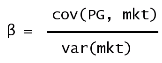

Calculating Beta from the example above

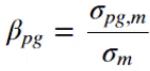

In [10]:
PG_beta = covariance_with_market / marketing_variance

In [11]:
print(f"PG Beta is = {PG_beta}, meaning it is a defensive stock since its value is smaller than 1")

PG Beta is = 0.6159576907140318, meaning it is a defensive stock since its value is smaller than 1


### Calculating the expected return of P&G (CAPM)

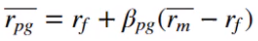

Risk free rate approximation **yield** value **0.68%** (0,0068) comes from [Bloomberg](https://www.bloomberg.com/markets/rates-bonds/government-bonds/us)

Equity Risk Premium [Wallstreet Mojo](https://www.wallstreetmojo.com/equity-risk-premium/)
For the United States, Equity Risk Premium is 6.25% (0.0625).


In [25]:
PG_expected_returns = 0.0068 + PG_beta * 0.06

In [26]:
print(f"Expected Returns when buying P&G stocks: {PG_expected_returns}")

Expected Returns when buying P&G stocks: 0.043757461442841906


### Calculating the Sharpe Ratio

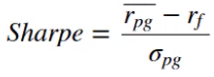

In [29]:
sharpe_ratio = (PG_expected_returns - 0.0068) / (securities_returns["PG"].std() * 250 ** 0.5)

In [30]:
sharpe_ratio

0.25869710941351104

We could use this ratio when we want to compare different stocks in stock portfolios.